In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import xgboost as xgb
#from xgboost import XGBRegressor

# Import supplementary visualization code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Training dataset
data = pd.read_csv("train.csv")

# Load the Test dataset
data_test = pd.read_csv("test.csv")

# Success - Display the first record
display(data.head(n=20))
display(data_test.head(20))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [134]:

# Data exploration
n_records = data.shape[0]

# count by gender

n_LotReg = data[(data.LotShape == 'Reg')].shape[0]
n_LotIR1 = data[(data.LotShape == 'IR1')].shape[0]


#Analyze the features. Counts of each feature by values 
feature_names = data.columns.tolist()

for column in feature_names:
    print(column)
    print(data[column].value_counts(dropna=False))

Id
1460    1
479     1
481     1
482     1
483     1
484     1
485     1
486     1
487     1
488     1
489     1
490     1
491     1
492     1
493     1
494     1
495     1
496     1
497     1
498     1
499     1
480     1
478     1
501     1
477     1
458     1
459     1
460     1
461     1
462     1
       ..
996     1
997     1
998     1
999     1
1000    1
1001    1
1002    1
983     1
982     1
981     1
970     1
962     1
963     1
964     1
965     1
966     1
967     1
968     1
969     1
971     1
980     1
972     1
973     1
974     1
975     1
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
LotFrontage
60.0     152


No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64
BsmtFinType1
Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64
BsmtFinSF1
0       467
24       12
16        9
20        5
686       5
616       5
936       5
662       5
428       4
655       4
442       4
1200      4
400       4
300       4
312       4
495       4
384       4
697       4
641       4
360       4
560       4
588       4
547       4
504       4
600       4
553       4
674       3
1036      3
403       3
672       3
       ... 
642       1
644       1
645       1
607       1
1014      1
1071      1
572       1
554       1
556       1
559       1
1070      1
562       1
564       1
566       1
1064      1
568       1
1053      1
573       1
602       1
575       1
1046      1
580       1
585       1
586       1
592       1
1032      1
1022      1
599       1
1018      1
1904      1
Name: BsmtFinSF1, Length: 637, dty

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64
GarageArea
0       81
440     49
576     47
240     38
484     34
528     33
288     27
400     25
480     24
264     24
308     20
420     19
280     16
672     15
216     12
504     12
336     12
352     12
360     11
564     11
300     10
462     10
572     10
540     10
539      9
660      9
180      9
384      9
312      9
286      9
        ..
414      1
413      1
768      1
455      1
708      1
757      1
711      1
714      1
481      1
716      1
479      1
719      1
477      1
721      1
475      1
722      1
726      1
732      1
738      1
739      1
740      1
748      1
749      1
752      1
753      1
754      1
459      1
458      1
756      1
1418     1
Name: GarageArea, Length: 441, dtype: int64
GarageQual
TA      1311
None      81
Fa        48
Gd        14
Ex         3
Po         3
Name: GarageQual, dtype: int64
GarageCond
TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex

In [6]:
# grouby LotArea variable to understand  distribution 
data.groupby("LotArea").count()

,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
LotArea,,,,,,,,,,,,,,,,,,,,,
1300,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,1,1,1,1,1,1
1477,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
1491,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
1526,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
1533,2,2,2,2,2,0,2,2,2,2,...,2,0,0,0,2,2,2,2,2,2
1596,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,1,1,1,1,1,1
1680,10,10,10,10,10,0,10,10,10,10,...,10,0,0,0,10,10,10,10,10,10
1869,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
1890,2,2,2,2,2,0,2,2,2,2,...,2,0,0,0,2,2,2,2,2,2


In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
data.shape

(1460, 81)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

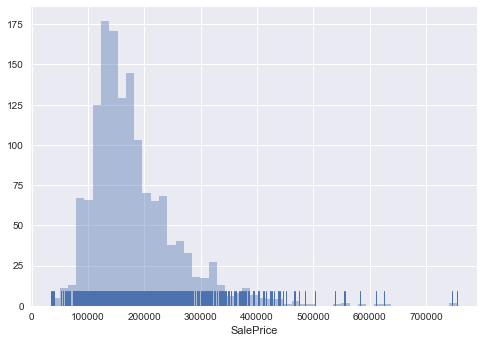

In [20]:
import seaborn as sb

sb.set(color_codes=True)
sb.distplot(data['SalePrice'],kde=False, rug=True);

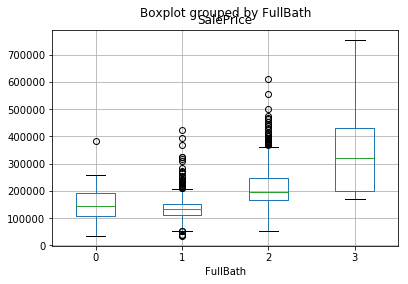

In [13]:

data.boxplot(column = 'SalePrice', by = 'FullBath' )


test


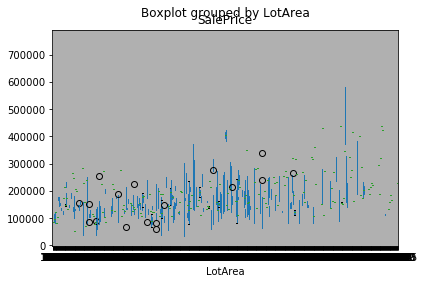

In [11]:

data.boxplot(column = 'SalePrice', by = 'LotArea' )
#print('test')

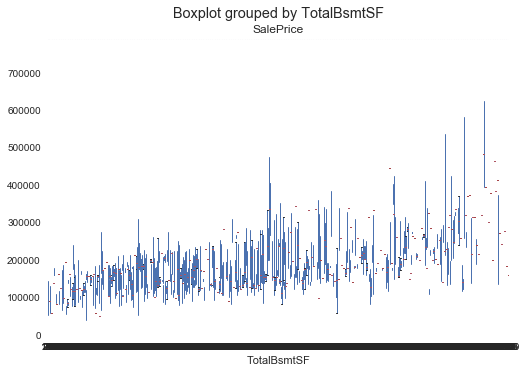

In [22]:
data.boxplot(column = 'SalePrice', by = 'TotalBsmtSF' )

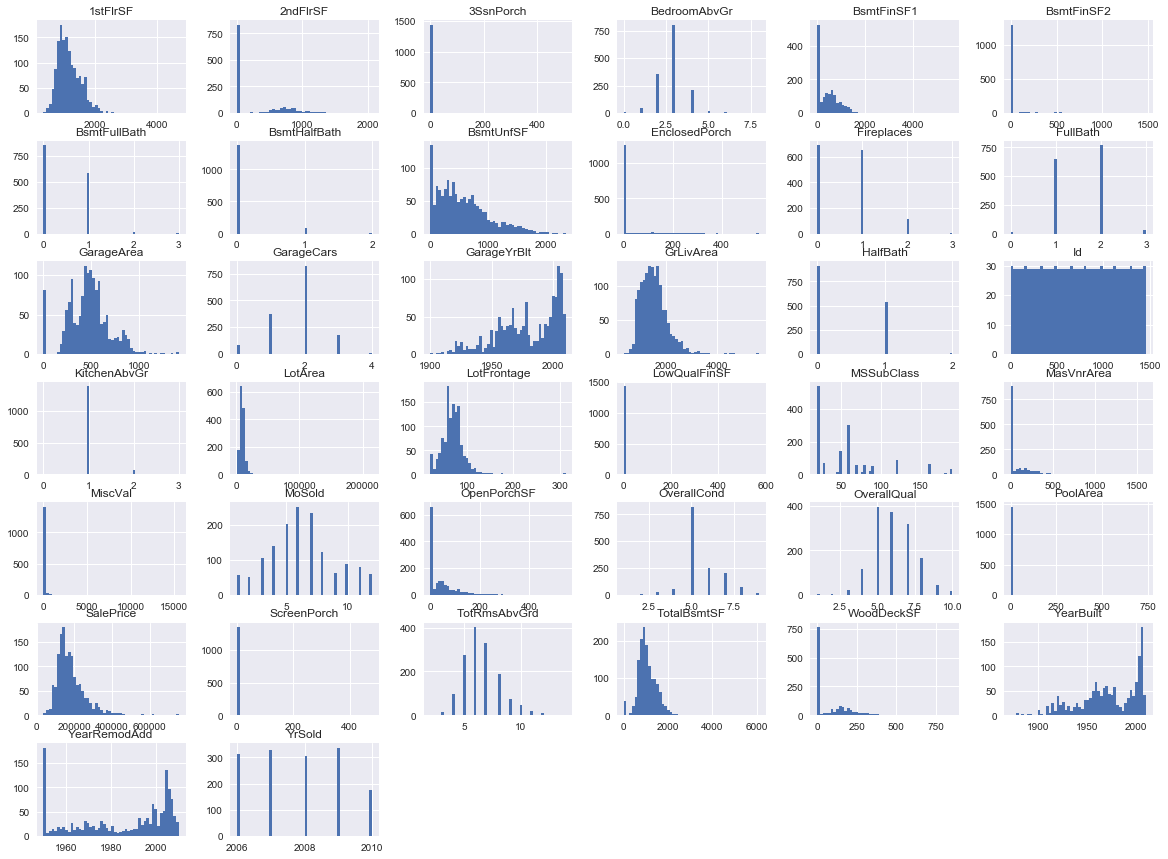

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [24]:
#Analyze the Correlation between the features and SalePrice
corr_matrix = data.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

C:\Users\Santosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


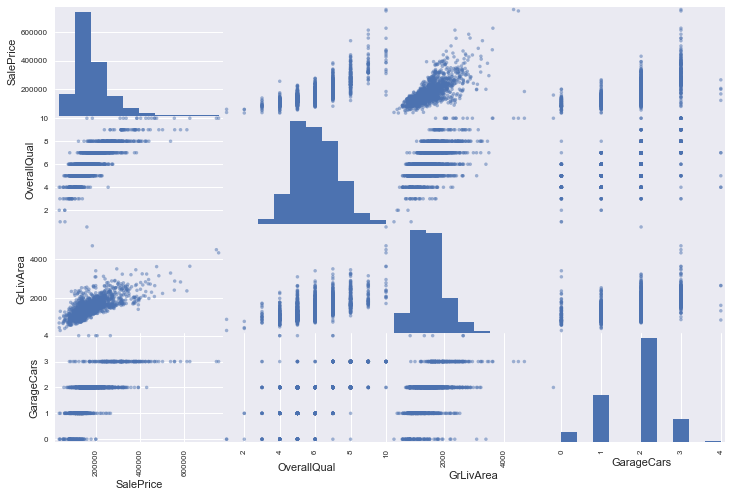

In [32]:
#Focus on the top 9 features which have a correlation greater than 0.5
from pandas.tools.plotting import scatter_matrix
#attributes = ["OverallQual", "GrLivArea"]
attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars"]
#attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF","1stFlrSF","FullBath",
#              "TotRmsAbvGrd","YearBuilt"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

C:\Users\Santosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


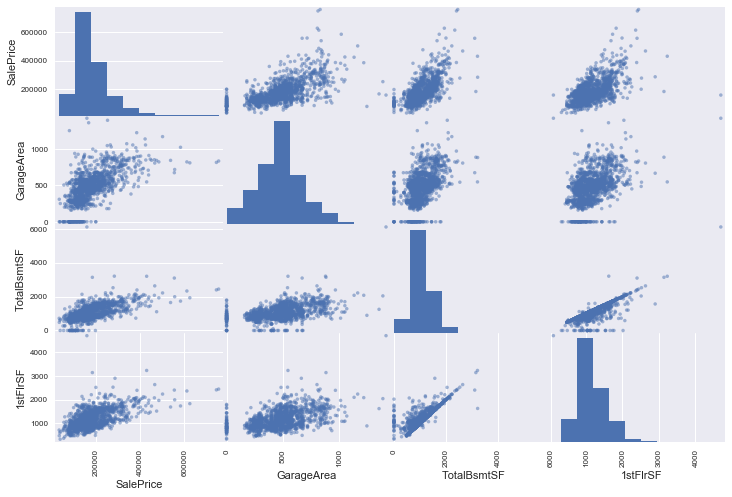

In [33]:
from pandas.tools.plotting import scatter_matrix

#attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars"]
attributes = ["SalePrice", "GarageArea", "TotalBsmtSF","1stFlrSF"]
#attributes = ["SalePrice","FullBath", "TotRmsAbvGrd","YearBuilt"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

C:\Users\Santosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


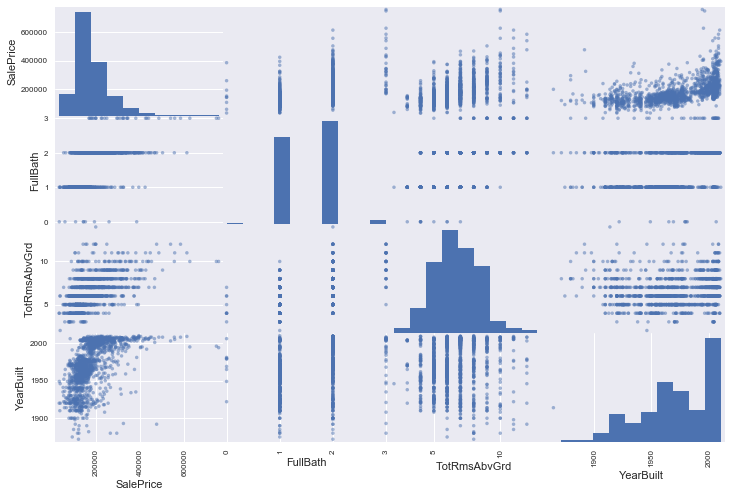

In [34]:
from pandas.tools.plotting import scatter_matrix

attributes = ["SalePrice","FullBath", "TotRmsAbvGrd","YearBuilt"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

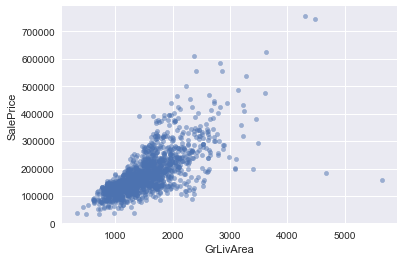

In [35]:
data.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5)
plt.savefig('scatter.png')

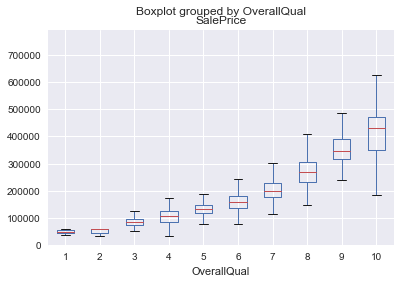

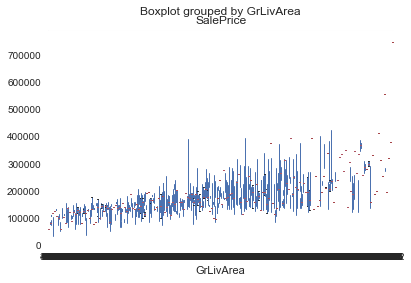

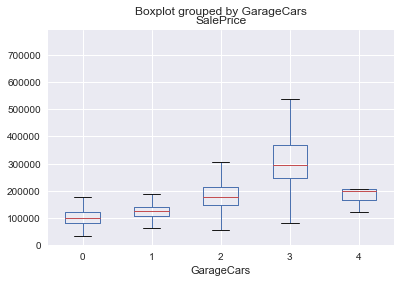

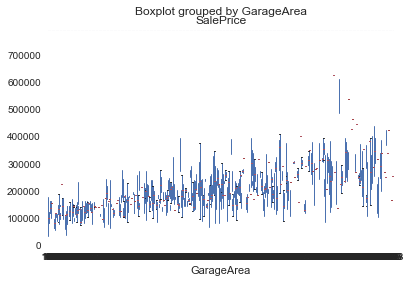

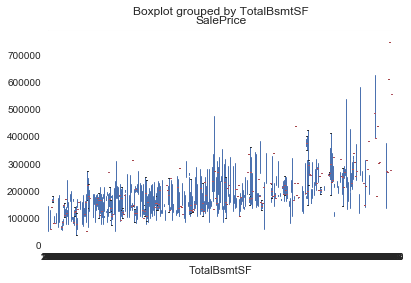

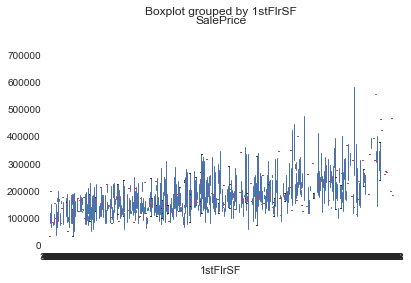

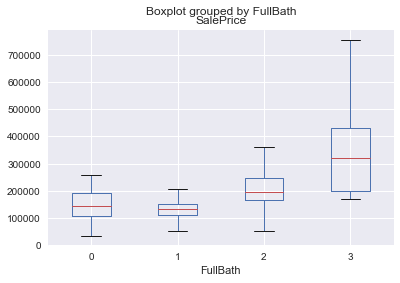

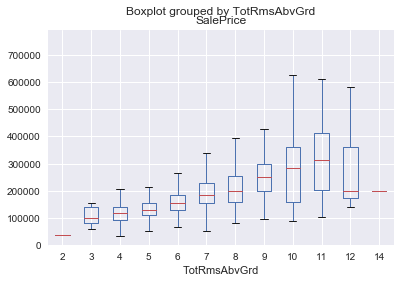

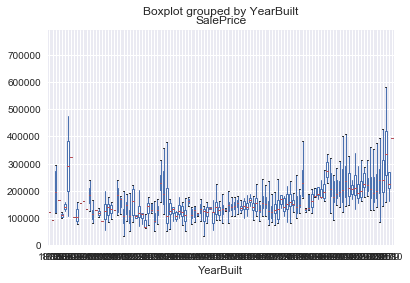

In [36]:
data.boxplot(column = 'SalePrice', by = 'OverallQual' )
data.boxplot(column = 'SalePrice', by = 'GrLivArea' )
data.boxplot(column = 'SalePrice', by = 'GarageCars' )
data.boxplot(column = 'SalePrice', by = 'GarageArea' )
data.boxplot(column = 'SalePrice', by = 'TotalBsmtSF' )
data.boxplot(column = 'SalePrice', by = '1stFlrSF' )
data.boxplot(column = 'SalePrice', by = 'FullBath' )
data.boxplot(column = 'SalePrice', by = 'TotRmsAbvGrd' )
data.boxplot(column = 'SalePrice', by = 'YearBuilt' )
#attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF","1stFlrSF","FullBath",
#              "TotRmsAbvGrd","YearBuilt"]


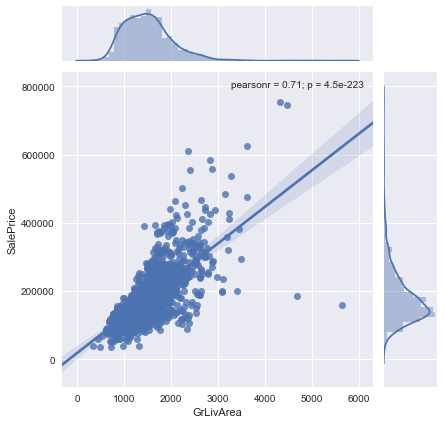

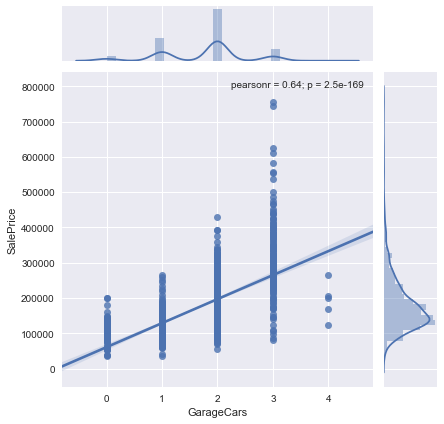

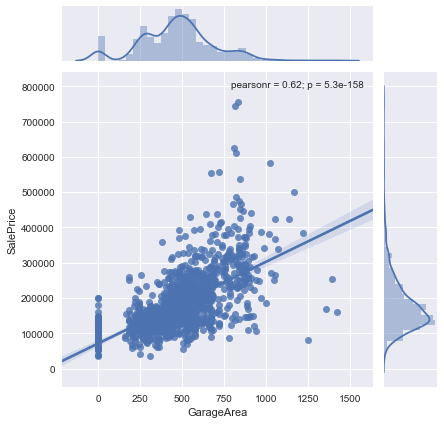

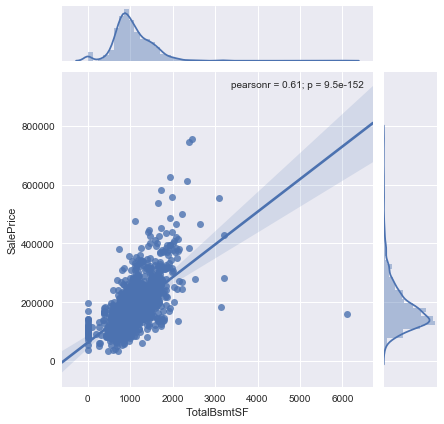

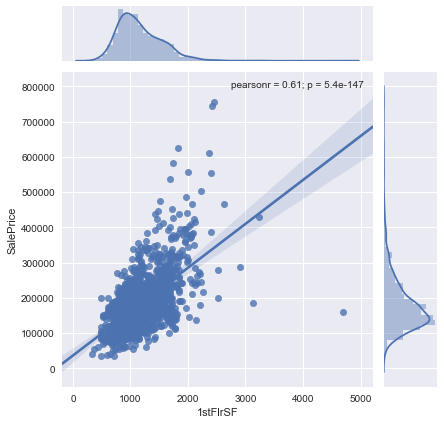

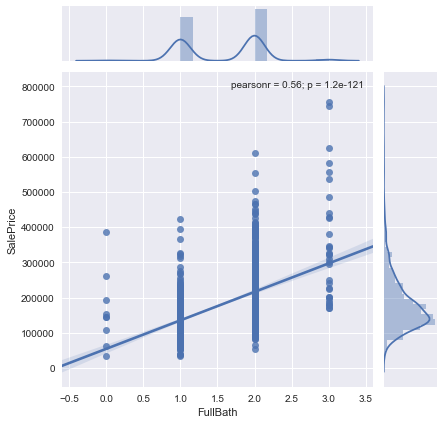

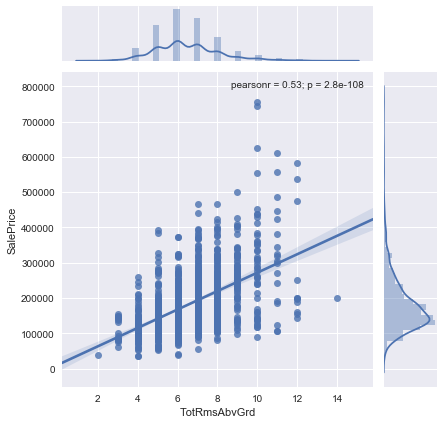

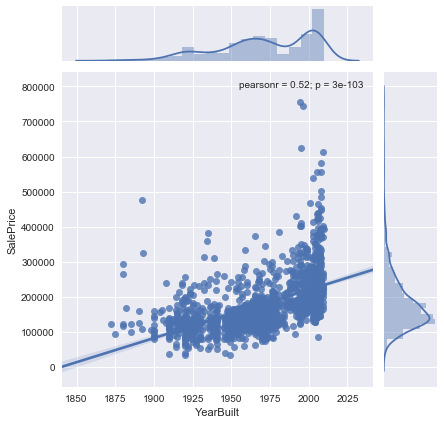

In [41]:
sb.jointplot(x=data['GrLivArea'], y=data['SalePrice'], kind='reg')
sb.jointplot(x=data['GarageCars'], y=data['SalePrice'], kind='reg')
sb.jointplot(x=data['GarageArea'], y=data['SalePrice'], kind='reg')
sb.jointplot(x=data['TotalBsmtSF'], y=data['SalePrice'], kind='reg')
sb.jointplot(x=data['1stFlrSF'], y=data['SalePrice'], kind='reg')
sb.jointplot(x=data['FullBath'], y=data['SalePrice'], kind='reg')
sb.jointplot(x=data['TotRmsAbvGrd'], y=data['SalePrice'], kind='reg')
sb.jointplot(x=data['YearBuilt'], y=data['SalePrice'], kind='reg')


In [52]:
# impute Nan with mean
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean')
imputer.fit(data[["GrLivArea"]])
data[["GrLivArea"]] = imputer.transform(data[["GrLivArea"]])
print(data["GrLivArea"].value_counts(dropna=False))
 
#imputer.fit(data[["GarageCars"]])
#data[["GarageCars"]] = imputer.transform(data[["GarageCars"]])
#print(data["GarageCars"].value_counts(dropna=False))

2.0    824
1.0    369
3.0    181
0.0     81
4.0      5
Name: GrLivArea, dtype: int64


In [60]:
#all_data = pd.concat((data)).reset_index(drop=True)
all_data = data
print(all_data)
print(all_data[all_data == 0].index)
#all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
#all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
#missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
#missing_data.head(20)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

In [21]:

#missing data
def clean_missing_data(data_inp):
    
    missing_data = data_inp.isnull().sum().sort_values(ascending=False)
    print(missing_data.head(20))

    data_inp["PoolQC"] = data_inp["PoolQC"].fillna("None")
    data_inp["MiscFeature"] = data_inp["MiscFeature"].fillna("None")
    data_inp["Alley"] = data_inp["Alley"].fillna("None")
    data_inp["Fence"] = data_inp["Fence"].fillna("None")
    data_inp["FireplaceQu"] = data_inp["FireplaceQu"].fillna("None")
    data_inp["LotFrontage"] = data_inp.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        data_inp[col] = data_inp[col].fillna('None')
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        data_inp[col] = data_inp[col].fillna(0)
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        data_inp[col] = data_inp[col].fillna(0)
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        data_inp[col] = data_inp[col].fillna('None')
    data_inp["MasVnrType"] = data_inp["MasVnrType"].fillna("None")
    data_inp["MasVnrArea"] = data_inp["MasVnrArea"].fillna(0)
    data_inp['MSZoning'] = data_inp['MSZoning'].fillna(data_inp['MSZoning'].mode()[0])
    data_inp = data.drop(['Utilities'], axis=1)
    data_inp["Functional"] = data_inp["Functional"].fillna("Typ")
    data_inp['Electrical'] = data_inp['Electrical'].fillna(data_inp['Electrical'].mode()[0])
    data_inp['KitchenQual'] = data_inp['KitchenQual'].fillna(data_inp['KitchenQual'].mode()[0])
    data_inp['Exterior1st'] = data_inp['Exterior1st'].fillna(data_inp['Exterior1st'].mode()[0])
    data_inp['Exterior2nd'] = data_inp['Exterior2nd'].fillna(data_inp['Exterior2nd'].mode()[0])
    data_inp['SaleType'] = data_inp['SaleType'].fillna(data_inp['SaleType'].mode()[0])
    data_inp['MSSubClass'] = data_inp['MSSubClass'].fillna("None")


    missing_data = data_inp.isnull().sum().sort_values(ascending=False)
    return missing_data
 


In [124]:
#benchmark using random forest with no feature optimization
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
ys = data

numeric_columns = ys.columns[ys.dtypes != 'object']

#print(numeric_columns)

data_numeric = ys.loc[:, numeric_columns]

#print(data_numeric)

y_train = data_numeric['SalePrice']
ys = data_numeric.drop('SalePrice', 1)

X_train, X_test, y_train, y_test = train_test_split(ys, y_train.values.ravel(),test_size=0.33, random_state=42)
#rmclf = RandomForestClassifier(max_depth=2, random_state=0)
#rmclf.fit(X_train, y_train)
#y_pred = rmclf.predict(X_test)

print(" y train")
print(y_train)


rf = RandomForestRegressor(10, max_features='sqrt')
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

 

print("prediction result")
print( y_predict.astype('int'))
print('accuracy', metrics.accuracy_score(y_test, y_predict.astype('int')))
#scores = cross_validation.train_test_split(X,y,stratify=y)
#scores = StratifiedKFold(rmclf, X, y, cv=10, scoring='accuracy')
#print(scores)


        
        

 y train
[137500 147000 232000 156000 170000  82500 155000 424870 236500 218000
 213000 312500 187000 181000 233000  95000  52000 181000 501837  88000
 112000 140000 167000 145250 210000 157500 212900 117500 185500  85000
 145000 255500 124000 134900 230500 110000 233230 157000 142600 154000
 179665  91000 197900 205000 161000 149900 207000 143000 281000 372500
 235000 214500 260000 149700 131000 144000 215000 176000 144000 155000
 290000 230000 290000 328900 142000 231500 162000 133000 386250 110500
 339750  87000 158500 170000  55000 138887 170000 240000 147400 289000
 135000 140000 333168 146500 354000 143000 265900 146000 165000  82000
 213250  79000 143000 130500 239900 177500 262280 227000 159500 217000
 410000 148000 178000 162900 187500 160000 212000 139000 108000  84000
 172000 104900 114504 106000 179900 102000 190000 340000 180000 206000
 131500 150000 186000 116900 299800 188000 143000 138500 260000 119000
 167500  85500 209500 206900 112000 193000 197500 139000 119750 1985

In [129]:


#print(data_numeric)

y_train_1 = data_numeric['SalePrice']
ys_1 = ys

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(ys_1, y_train_1.values.ravel(),test_size=0.33, random_state=42)

#print(" y train")
#print(y_train)

rf = RandomForestRegressor(10, max_features='sqrt')
rf.fit(X_train_1, y_train_1)
y_predict_1 = rf.predict(X_test_1)
 

print("prediction result")
print( y_predict_1.astype('int'))
print('accuracy', metrics.accuracy_score(y_test_1, y_predict_1.astype('int')))
#scores = cross_validation.train_test_split(X,y,stratify=y)
#scores = StratifiedKFold(rmclf, X, y, cv=10, scoring='accuracy')
#print(scores)

prediction result
[129685 314287 128525 161730 303999  89400 220752 154790  88350 122500
 138385 125480 128245 197340 190370 122255 185299 126875 120215 236310
 161930 206052 170987 129690 217419 180880 179984 105345 181150 180476
 116850 264085 204120 107340 277631 144310 146690 210133 306795 121270
 127940 227579 120285 361536 139950 135650 123390 125575 383898 134575
 115700 192570 128340 302313 139660 280838 195340 146725 140785 123290
  71940 153500 303390 269273 280670 211059 107025 324433 121730 164452
 118974 138260 110615  98866 431104 195400 304350 271869 131850 116140
 106100 106040 135095 108750 154765 121313 256140 238790 141870 170582
 179120 154930 127450 243125 143861 171375 143140 161610 218489 242994
 193666 203720 301400 125210 184015 161725 145920 277740 144350 183515
  64020 127396 140745 129323 207495 123750 105330 119450 137706 285380
 144080 141340 175590 156500 190649 135565 220750 109030 147940 183750
 191320 349442 207517 119600  83080 347777 344005 126690 23

Electrical      1
SalePrice       0
Foundation      0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
BsmtQual        0
YearRemodAdd    0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
RoofStyle       0
dtype: int64
Electrical      1
SalePrice       0
Foundation      0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
BsmtQual        0
YearRemodAdd    0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
RoofStyle       0
dtype: int64
SalePrice        0
SaleCondition    0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFin

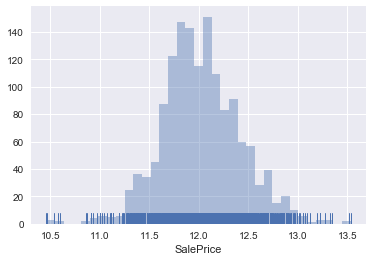

In [49]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split
from sklearn import metrics

import seaborn as sb

df = pd.concat([data, data_test], axis=0)

numeric_columns = data.columns[data.dtypes != 'object']
data_numeric1 = data.loc[:, numeric_columns]
ys1 = data_numeric1

sb.set(color_codes=True)
sb.distplot(data_numeric1['SalePrice'][data_numeric1['SalePrice'].notnull()].apply(np.log),kde=False, rug=True);

 
missing_data = data.isnull().sum().sort_values(ascending=False)
print(missing_data.head(20))

print clean_missing_data(data)

print(data_numeric1.head())


##Trying with Log functions


yTrain1 = data_numeric1['SalePrice']
ys1 =  data_numeric1[['GrLivArea','GarageCars', '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'YearBuilt'  ]]

print(len(ys1))
print(len(yTrain1))

 


In [32]:
 

xTrain1, xTest1, yTrain1, yTest1 = train_test_split(ys1, yTrain1,test_size=0.33, random_state=42)

print(len(xTrain1), len(xTest1),len(yTrain1), len(yTest1) )

# Fitting the model and predicting using xgboost
regrXGB = xgb.XGBRegressor(colsample_bytree=0.4,
                gamma=0.045,
                learning_rate=0.07,
                max_depth=20,
                min_child_weight=1.5,
                n_estimators=300,
                reg_alpha=0.65,
                reg_lambda=0.45,
                subsample=0.95)
regrXGB.fit(xTrain1, yTrain1)
y_pred_xgb = regrXGB.predict(xTest1)

print("prediction result")
print( y_pred_xgb.astype('int'))
print('accuracy', metrics.accuracy_score(yTest1.astype('int'), y_pred_xgb.astype('int')))
    


(978, 482, 978, 482)
prediction result
[136567 262337 121747 155508 255548  81269 165759 148619  69497 114887
 136262 111585 149945 206067 186948 110020 181269 148226 110723 197180
 265800 191695 170051 103577 193020 176770 218944 110697 179841 196693
 120708 234263 293573 127160 251452 146981 160313 216799 261519  99523
 162315 215947 109476 372942 156015 152536 136172 108797 437243 123559
 135018 226649  90547 303080 143998 277550 172017 160116 149240  95934
  77179 128924 307448 227693 235091 191398 109028 300356 127661 165043
 118887 139124 124801  94450 455841 213515 294982 268242 141275 136318
  95566 114102 148816  91187 146554 146561 245904 198453 143998 172503
 181390 163573 133564 276325 220864 186723 161353 172300 231004 188484
 166486 215216 302751 137929 188887 169488 142634 300846 141372 187365
  70897 133197 134168 130408 211062 100241 120638 124211 149967 286089
 128717 143998 194751 190932 145495 109356 213332 106992 156382 175273
 176936 296286 202988 114112  94969 28

In [50]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

from sklearn.preprocessing import LabelEncoder

print clean_missing_data(df)

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))
    

SalePrice       1459
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
dtype: int64
SalePrice        0
SaleCondition    0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
LandContour      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape        

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import xgboost as xgb
#from xgboost import XGBRegressor

# Import supplementary visualization code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Training dataset
data_train = pd.read_csv("train.csv")

# Load the Test dataset
data_test = pd.read_csv("test.csv")

print((data_train.shape))
print((data_test.shape))

data_all = pd.concat([data_train, data_test], axis=0)

# Success - Display the first record
display(data_all.head(n=20))

(1460, 81)
(1459, 80)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,NaN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,NaN,2,2fmCon,TA,No,851.0,0.0,...,WD,0,Pave,5,991.0,AllPub,0,1939,1950,2008


In [2]:

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean')
imputer.fit(data_train[["GrLivArea"]])
data_train[["GrLivArea"]] = imputer.transform(data_train[["GrLivArea"]])
#print(data_train["GrLivArea"].value_counts(dropna=False))

#data_train_1 = data_train
       

#print(data_train_1)

In [16]:
def rand_f(data_train_1):

    #benchmark using random forest with no feature optimization
    from sklearn.cross_validation import StratifiedKFold
    from sklearn.cross_validation import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    from sklearn import metrics

    y_train = data_train_1['SalePrice']
    ys = data_train_1.drop('SalePrice', 1)

    X_train, X_test, y_train, y_test = train_test_split(ys, y_train.values.ravel(),test_size=0.33, random_state=42)

    rf = RandomForestRegressor(10, max_features='sqrt')
    rf.fit(X_train, y_train)
    y_predict = rf.predict(X_test)
      
    score_train = rf.score(X_train, y_train)
    score_test = rf.score(X_test, y_test)
    
    print("RANDOM F Accuracy on training set: {:.3f}".format(score_train))
    print("RANDOM F Accuracy on test set: {:.3f}".format(score_test))

    return score_train, score_test

In [4]:
def xgbr(data_train_1):

    import xgboost as xgb
    from sklearn.cross_validation import train_test_split
    from sklearn import metrics

    y_train = data_train_1['SalePrice']
    ys = data_train_1.drop('SalePrice', 1)
    
    X_train, X_test, y_train, y_test = train_test_split(ys, y_train.values.ravel(),test_size=0.33, random_state=42)
        
    # Fitting the model and predicting using xgboost
    regrXGB = xgb.XGBRegressor(colsample_bytree=0.4,
                    gamma=0.045,
                    learning_rate=0.07,
                    max_depth=20,
                    min_child_weight=1.5,
                    n_estimators=300,
                    reg_alpha=0.65,
                    reg_lambda=0.45,
                    subsample=0.95)
    
    regrXGB.fit(X_train, y_train)
    y_pred_xgb = regrXGB.predict(X_test)
    
    score_train = regrXGB.score(X_train, y_train)
    score_test = regrXGB.score(X_test, y_test)
    
    print("XGB Accuracy on training set: {:.3f}".format(score_train))
    print("XGB Accuracy on test set: {:.3f}".format(score_test))

    return score_train, score_test

In [5]:
def SVCM(data_train_2):
    
    from sklearn.svm import SVC
    from sklearn.model_selection import train_test_split

    y_train = data_train_2['SalePrice']
    ys = data_train_2.drop('SalePrice', 1)
    
    # create train and test sets
    X_train, X_test, y_train, y_test = train_test_split(ys, y_train.values.ravel(),test_size=0.33, random_state=42) 

    # Instantiate classifier
    svc = SVC(kernel = "linear")  
    print("IN SVCM")
    # fit on training data
    svc.fit(X_train, y_train)
    
    score_train = svc.score(X_train, y_train)
    score_test = svc.score(X_test, y_test)
    
    print("SVC Accuracy on training set: {:.3f}".format(score_train))
    print("SVC Accuracy on test set: {:.3f}".format(score_test))

    return score_train, score_test

In [19]:
data_train_cols = data_train[['GrLivArea','FullBath','OverallQual','SalePrice']]
score_train,score_test = rand_f(data_train_cols)

score_train,score_test = xgbr(data_train_cols)

score_train,score_test = SVCM(data_train_cols)



RANDOM F Accuracy on training set: 0.939
RANDOM F Accuracy on test set: 0.713
XGB Accuracy on training set: 0.935
XGB Accuracy on test set: 0.604
IN SVCM
SVC Accuracy on training set: 0.084
SVC Accuracy on test set: 0.017


In [8]:
attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF","1stFlrSF","FullBath",
              "TotRmsAbvGrd","YearBuilt"]

data_train_cols = data_train[attributes]
score_train,score_test = rand_f(data_train_cols)

score_train,score_test = xgbr(data_train_cols)

#score_train,score_test = SVCM(data_train_cols)

RANDOM F Accuracy on training set: 0.966
RANDOM F Accuracy on test set: 0.871
XGB Accuracy on training set: 1.000
XGB Accuracy on test set: 0.806


In [6]:
def clean_missing_data(data_inp):
    
    missing_data = data_inp.isnull().sum().sort_values(ascending=False)
    print('Initial Missing Data', missing_data.head(20))

    data_inp["PoolQC"] = data_inp["PoolQC"].fillna("None")
    data_inp["MiscFeature"] = data_inp["MiscFeature"].fillna("None")
    data_inp["Alley"] = data_inp["Alley"].fillna("None")
    data_inp["Fence"] = data_inp["Fence"].fillna("None")
    data_inp["FireplaceQu"] = data_inp["FireplaceQu"].fillna("None")
    data_inp["LotFrontage"] = data_inp.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        data_inp[col] = data_inp[col].fillna('None')
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        data_inp[col] = data_inp[col].fillna(0)
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        data_inp[col] = data_inp[col].fillna(0)
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        data_inp[col] = data_inp[col].fillna('None')
    data_inp["MasVnrType"] = data_inp["MasVnrType"].fillna("None")
    data_inp["MasVnrArea"] = data_inp["MasVnrArea"].fillna(0)
    data_inp['MSZoning'] = data_inp['MSZoning'].fillna(data_inp['MSZoning'].mode()[0])
    data_inp = data_inp.drop(['Utilities'], axis=1)
    data_inp["Functional"] = data_inp["Functional"].fillna("Typ")
    data_inp['Electrical'] = data_inp['Electrical'].fillna(data_inp['Electrical'].mode()[0])
    data_inp['KitchenQual'] = data_inp['KitchenQual'].fillna(data_inp['KitchenQual'].mode()[0])
    data_inp['Exterior1st'] = data_inp['Exterior1st'].fillna(data_inp['Exterior1st'].mode()[0])
    data_inp['Exterior2nd'] = data_inp['Exterior2nd'].fillna(data_inp['Exterior2nd'].mode()[0])
    data_inp['SaleType'] = data_inp['SaleType'].fillna(data_inp['SaleType'].mode()[0])
    data_inp['MSSubClass'] = data_inp['MSSubClass'].fillna("None")


    missing_data = data_inp.isnull().sum().sort_values(ascending=False)
    return missing_data

In [18]:
data_train_clean = data_train

print clean_missing_data(data_train_clean)
data_train_cols = data_train_clean[attributes]
score_train,score_test = rand_f(data_train_cols)
score_train,score_test = xgbr(data_train_cols)

('Initial Missing Data', PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64)
SalePrice        0
SaleCondition    0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
LandContour      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley    